# **PROJECT TITLE: ANALYZING VEHICLE TRENDS IN THE GLOBAL CAR MARKET**

![Cars](Cars.png)

# **PROJECT OVERVIEW**

# **OBJECTIVES**
1. To determine the key factors that influence car prices, such as mileage, engine size, fuel type, transmission, and year of manufacture.

2. To analyze the price distribution across different car models, manufacturers, and fuel types.

3. To identify trends in car pricing over the years and how depreciation affects value.

4. To compare the popularity and availability of different car models

In [3]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df_Cars = pd.read_csv("Data/cars_data.csv")
df_Cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447.0,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995.0,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950.0,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700.0,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


# EXPLORATORY DATA ANALYSIS

In [5]:
df_Cars.shape

(97712, 10)

In [6]:
df_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         96727 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      93586 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           94256 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.5+ MB


In [7]:
df_Cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,96727.000000,97712.000000,97712.000000,94256.000000,97712.000000
mean,2017.066502,16774.299823,23219.475499,120.142408,55.228326,1.664913
std,2.118661,9874.715050,21060.882301,63.357250,16.296400,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14471.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [8]:
# check for missing values
missing = df_Cars.isnull().sum()
print("Missing values per column:\n")
print(missing)

Missing values per column:

model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64


In [9]:
# Check how many rows are affected overall
print(f"Total rows: {len(df_Cars)}")
print(f"Rows with any missing values: {df_Cars.isnull().any(axis=1).sum()}")

Total rows: 97712
Rows with any missing values: 4126


### **1. DATA CLEANING**

In [10]:
# Fill missing values with the mean of the column
df_Cars['price'] = df_Cars['price'].fillna(df_Cars['price'].mean())
df_Cars['mpg'] = df_Cars['mpg'].fillna(df_Cars['mpg'].mean())

# Fill missing values in 'fuelType' with the mode
df_Cars['fuelType'] = df_Cars['fuelType'].fillna(df_Cars['fuelType'].mode()[0])

   

In [11]:
# check if missing values have been filled
missing = df_Cars.isnull().sum()
print(missing)


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64


In [12]:
# Check for duplicates in the DataFrame
duplicates = df_Cars[df_Cars.duplicated()]

# Count the number of duplicate rows
duplicate_count = duplicates.shape[0]

# Display the duplicates
print(f"Number of duplicate rows: {duplicate_count}")
print(duplicates)


Number of duplicate rows: 1
       model  year         price transmission  mileage fuelType  tax  \
71595   Kuga  2018  16774.299823       Manual     9500   Petrol  145   

             mpg  engineSize Manufacturer  
71595  55.228326         1.5         ford  


In [13]:
# Remove duplicates (keep the first occurrence)
df_Cars = df_Cars.drop_duplicates()

# Or remove duplicates and keep the last occurrence
df_Cars = df_Cars.drop_duplicates(keep='last')

# Verify that duplicates are removed
print(df_Cars)


               model  year    price transmission  mileage fuelType  tax   mpg  \
0                I10  2017   7495.0       Manual    11630   Petrol  145  60.1   
1               Polo  2017  10989.0       Manual     9200   Petrol  145  58.9   
2           2 Series  2019  27990.0    Semi-Auto     1614   Diesel  145  49.6   
3       Yeti Outdoor  2017  12495.0       Manual    30960   Diesel  150  62.8   
4             Fiesta  2017   7999.0       Manual    19353   Petrol  125  54.3   
...              ...   ...      ...          ...      ...      ...  ...   ...   
97707         Fiesta  2017  10447.0    Automatic     8337   Petrol  145  54.3   
97708       3 Series  2014  14995.0       Manual    25372   Diesel   30  61.4   
97709         Fiesta  2017   8950.0       Manual    19910   Petrol  125  54.3   
97710          Astra  2017  10700.0    Automatic    24468   Petrol  125  50.4   
97711    Grandland X  2019  15798.0       Manual    10586   Diesel  150  48.7   

       engineSize Manufactu

In [15]:
# Save the cleaned DataFrame to a new excel file
df_Cars.to_excel('Data/df_Cars.cleaned.xlsx', index=False)


## **2.DATA VISUALIZATION**

### **1. Price Analysis** 

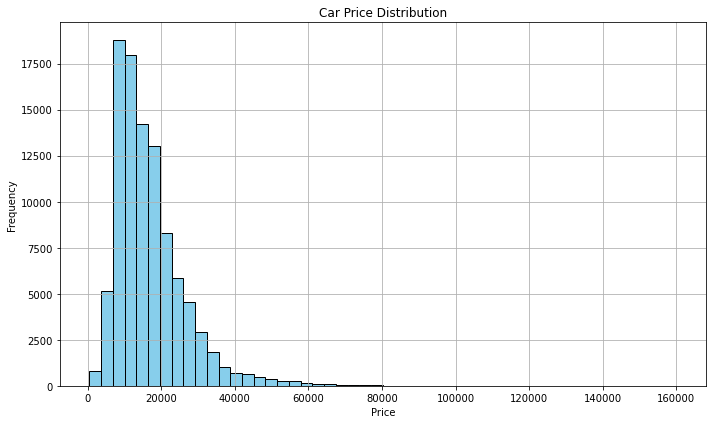

In [ ]:

# Plotting the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_Cars['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


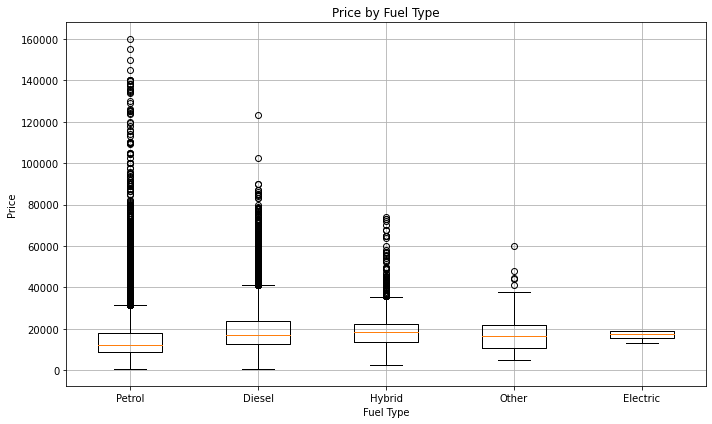

In [24]:
# Create a list of prices grouped by fuel type
fuel_types = df_Cars['fuelType'].unique()
data = [df_Cars[df_Cars['fuelType'] == fuel]['price'] for fuel in fuel_types]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=fuel_types)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### **2. Trend Over Time: Average Price by Year**

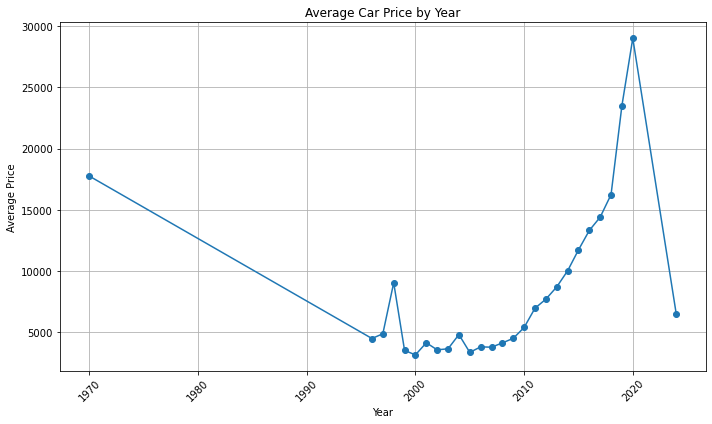

In [22]:
## Group by year and calculate average price
avg_price_by_year = df_Cars.groupby('year')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **3. Relationships Between Features**

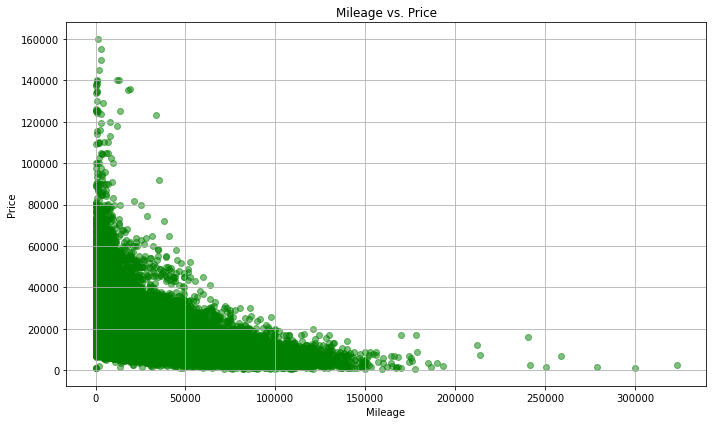

In [ ]:
# Mileage vs. Price
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_Cars['mileage'], df_Cars['price'], alpha=0.5, color='green')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


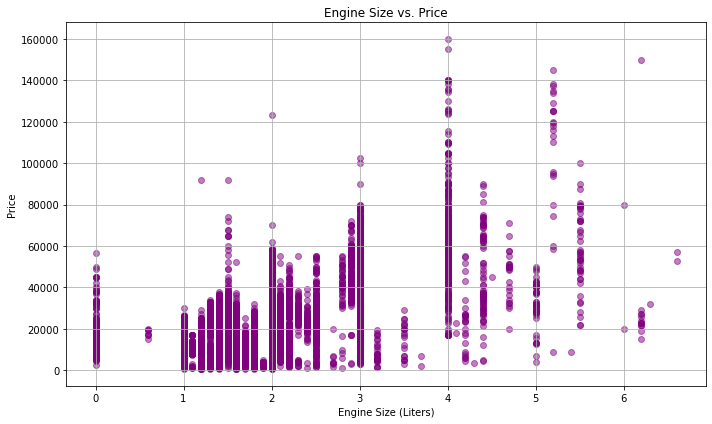

In [27]:
#  Engine Size vs. Price
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_Cars['engineSize'], df_Cars['price'], alpha=0.5, color='purple')
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### **4.  Categorical Distributions**

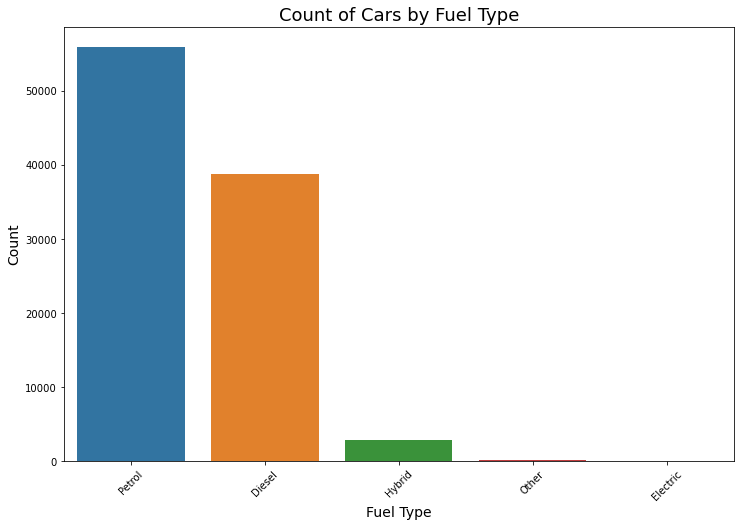

In [ ]:
# Count Plot of Fuel Types
import seaborn as sns
plt.figure(figsize=(12, 8))  
sns.countplot(x='fuelType', data=df_Cars)
plt.title('Count of Cars by Fuel Type', fontsize=18)  
plt.xlabel('Fuel Type', fontsize=14)                   
plt.ylabel('Count', fontsize=14)                       
plt.xticks(rotation=45)                               
plt.show()

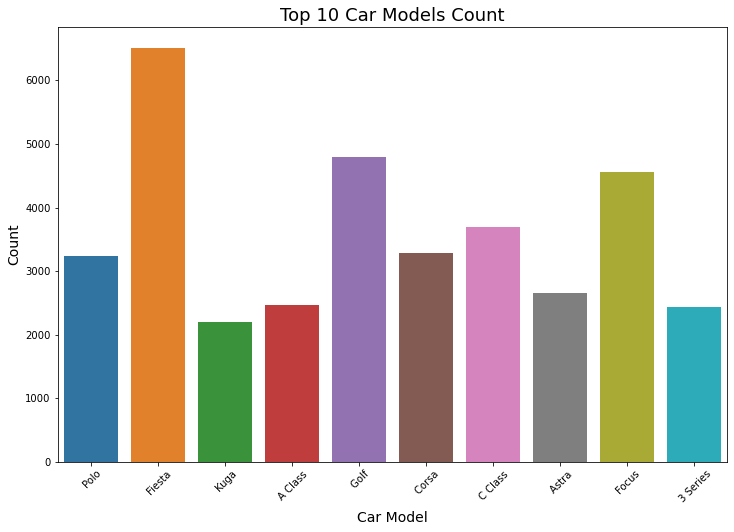

In [ ]:
# Count Plot of Car Models
plt.figure(figsize=(12, 8))  
sns.countplot(data=df_Cars[df_Cars['model'].isin(top_models)], x='model')
plt.title('Top 10 Car Models Count', fontsize=18)   
plt.xlabel('Car Model', fontsize=14)                 
plt.ylabel('Count', fontsize=14)                     
plt.xticks(rotation=45)                              
plt.show()


## **3. HYPOTHESIS TESTING**
ANOVA TEST

Null Hypothesis (H₀):
The mean prices are equal across all car manufacturers.

Alternative Hypothesis (H₁):
At least one manufacturer has a significantly different mean price.

In this project, I performed an ANOVA (Analysis of Variance) test to determine if there are significant differences in the average price of cars across different car manufacturers in my dataset.



In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset (example)
# df_Cars = pd.read_csv('path_to_cars_dataset.csv')

# List of car manufacturers (make sure these exist in the 'Manufacturer' column)
manufacturers = df_Cars['Manufacturer'].unique()

# Perform an ANOVA test to compare the average price across manufacturers
anova_result = stats.f_oneway(
    *[df_Cars[df_Cars['Manufacturer'] == manufacturer]['price'] for manufacturer in manufacturers]
)

# Display ANOVA result
print("ANOVA Test Result: ", anova_result)


ANOVA Test Result:  F_onewayResult(statistic=4785.617923766394, pvalue=0.0)


F-statistic = 4785.62
The calculated F-statistic is extremely high, indicating a large difference in mean prices across the manufacturers.

p-value = 0.0
A p-value of 0.0 means that the difference in prices is highly significant. Since the p-value is much smaller than 0.05, we reject the null hypothesis and conclude that at least one manufacturer has a significantly different average price.

The ANOVA test shows that there are statistically significant differences in the average prices of cars across the different manufacturers in the dataset. Therefore, the manufacturer plays a key role in determining car price variation.



## **4.DATA MODELING**
In this part of the analysis, am building a linear regression model to predict the price of cars based on their engine size. The linear regression approach assumes a linear relationship between the predictor variable (engine size) and the target variable (car price).

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df_Cars[['engineSize']]  
y = df_Cars['price']         

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 57589675.25
R-squared: 0.38


Mean Squared Error 57589675.25:This means that, on average, the model's predictions are off by a significant amount, which could indicate the model needs improvement.

R² = 0.38: This suggests that engine size only explains 38% of the variation in car prices, which is relatively low. Therefore, engine size alone is not a strong predictor of price, and additional features might improve the model's performance.

Modelling Conclusion
This linear regression model attempts to predict car prices based on engine size. The MSE and R² values are important metrics that provide insight into the accuracy and performance of the model. Based on these values, you can assess whether engine size alone is a good predictor of car prices or whether additional features (e.g., mileage, year, fuel type) should be included to improve the model.